In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import keras
from sklearn.linear_model import LogisticRegression

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations

In [2]:
# Preparing Training Data
data = pd.read_csv(r"C:\Users\Win\Documents\Github Workspace\Machine_Learning\Project\Train Data.csv")
# data = pd.read_csv(r"C:\Users\Win\Documents\Github Workspace\Machine_Learning\Project\emtab_zscore (1).csv", delimiter="\t")

# data = pd.read_csv(r"C:\Users\Win\Documents\Github Workspace\Machine_Learning\Project\gse58208_zscore.csv", delimiter="\t")
# data['disease.state.ch1'] = data['disease.state.ch1'].replace({
#     'hepatocellular carcinoma': 1,
#     'Chronic hepatitis B' : 2,
#     'healthy control': 0
# })

X_train = data.iloc[:, :-1].values
y_train = data.iloc[:, -1].values

display(data)
# print(X_train)
# print(y_train)
# print(X_train.shape)
# print(y_train.shape)

# Preparing Test and Cross Validate Data
data1 = pd.read_csv(r"C:\Users\Win\Documents\Github Workspace\Machine_Learning\Project\Test & CV.csv", delimiter="\t")

X_= data1.iloc[:, :-1].values
y_ = data1.iloc[:, -1].values

# display(data1)
# print(X_)
# print(y_)

X_cv, X_test, y_cv, y_test = train_test_split(X_, y_, test_size=0.5, random_state=1)


print(f"Train: {X_train.shape}")
print(f"CV: {X_cv.shape}")
print(f"Test: {X_test.shape}")

,201506_at,205486_at,216638_s_at,221619_s_at,221672_s_at,35148_at,Characteristics..Relapse..Metastasis.
0,-1.194502,-1.368737,-0.717225,-1.531878,0.389693,0.000420,0
1,0.693175,-0.590901,-0.546195,0.037206,-0.128537,0.357764,0
2,0.333743,-0.739208,0.209520,0.644257,0.195022,0.387819,1
3,1.000242,-0.090453,1.383431,0.564629,0.031483,-0.001509,0
4,0.610597,-0.321874,-0.335347,-0.455115,-0.401555,-0.026012,1
...,...,...,...,...,...,...,...
522,-1.250697,-0.169552,-0.780680,-1.270128,-2.083823,-1.229551,0
523,0.797979,-0.064454,0.313360,-0.489885,-1.616572,0.942426,0
524,-0.338362,2.031796,-0.930988,0.944626,-1.323058,0.286487,0
525,0.050661,0.274132,2.433399,-0.403539,-1.791106,-0.147379,0


Train: (527, 6)
CV: (143, 6)
Test: (143, 6)


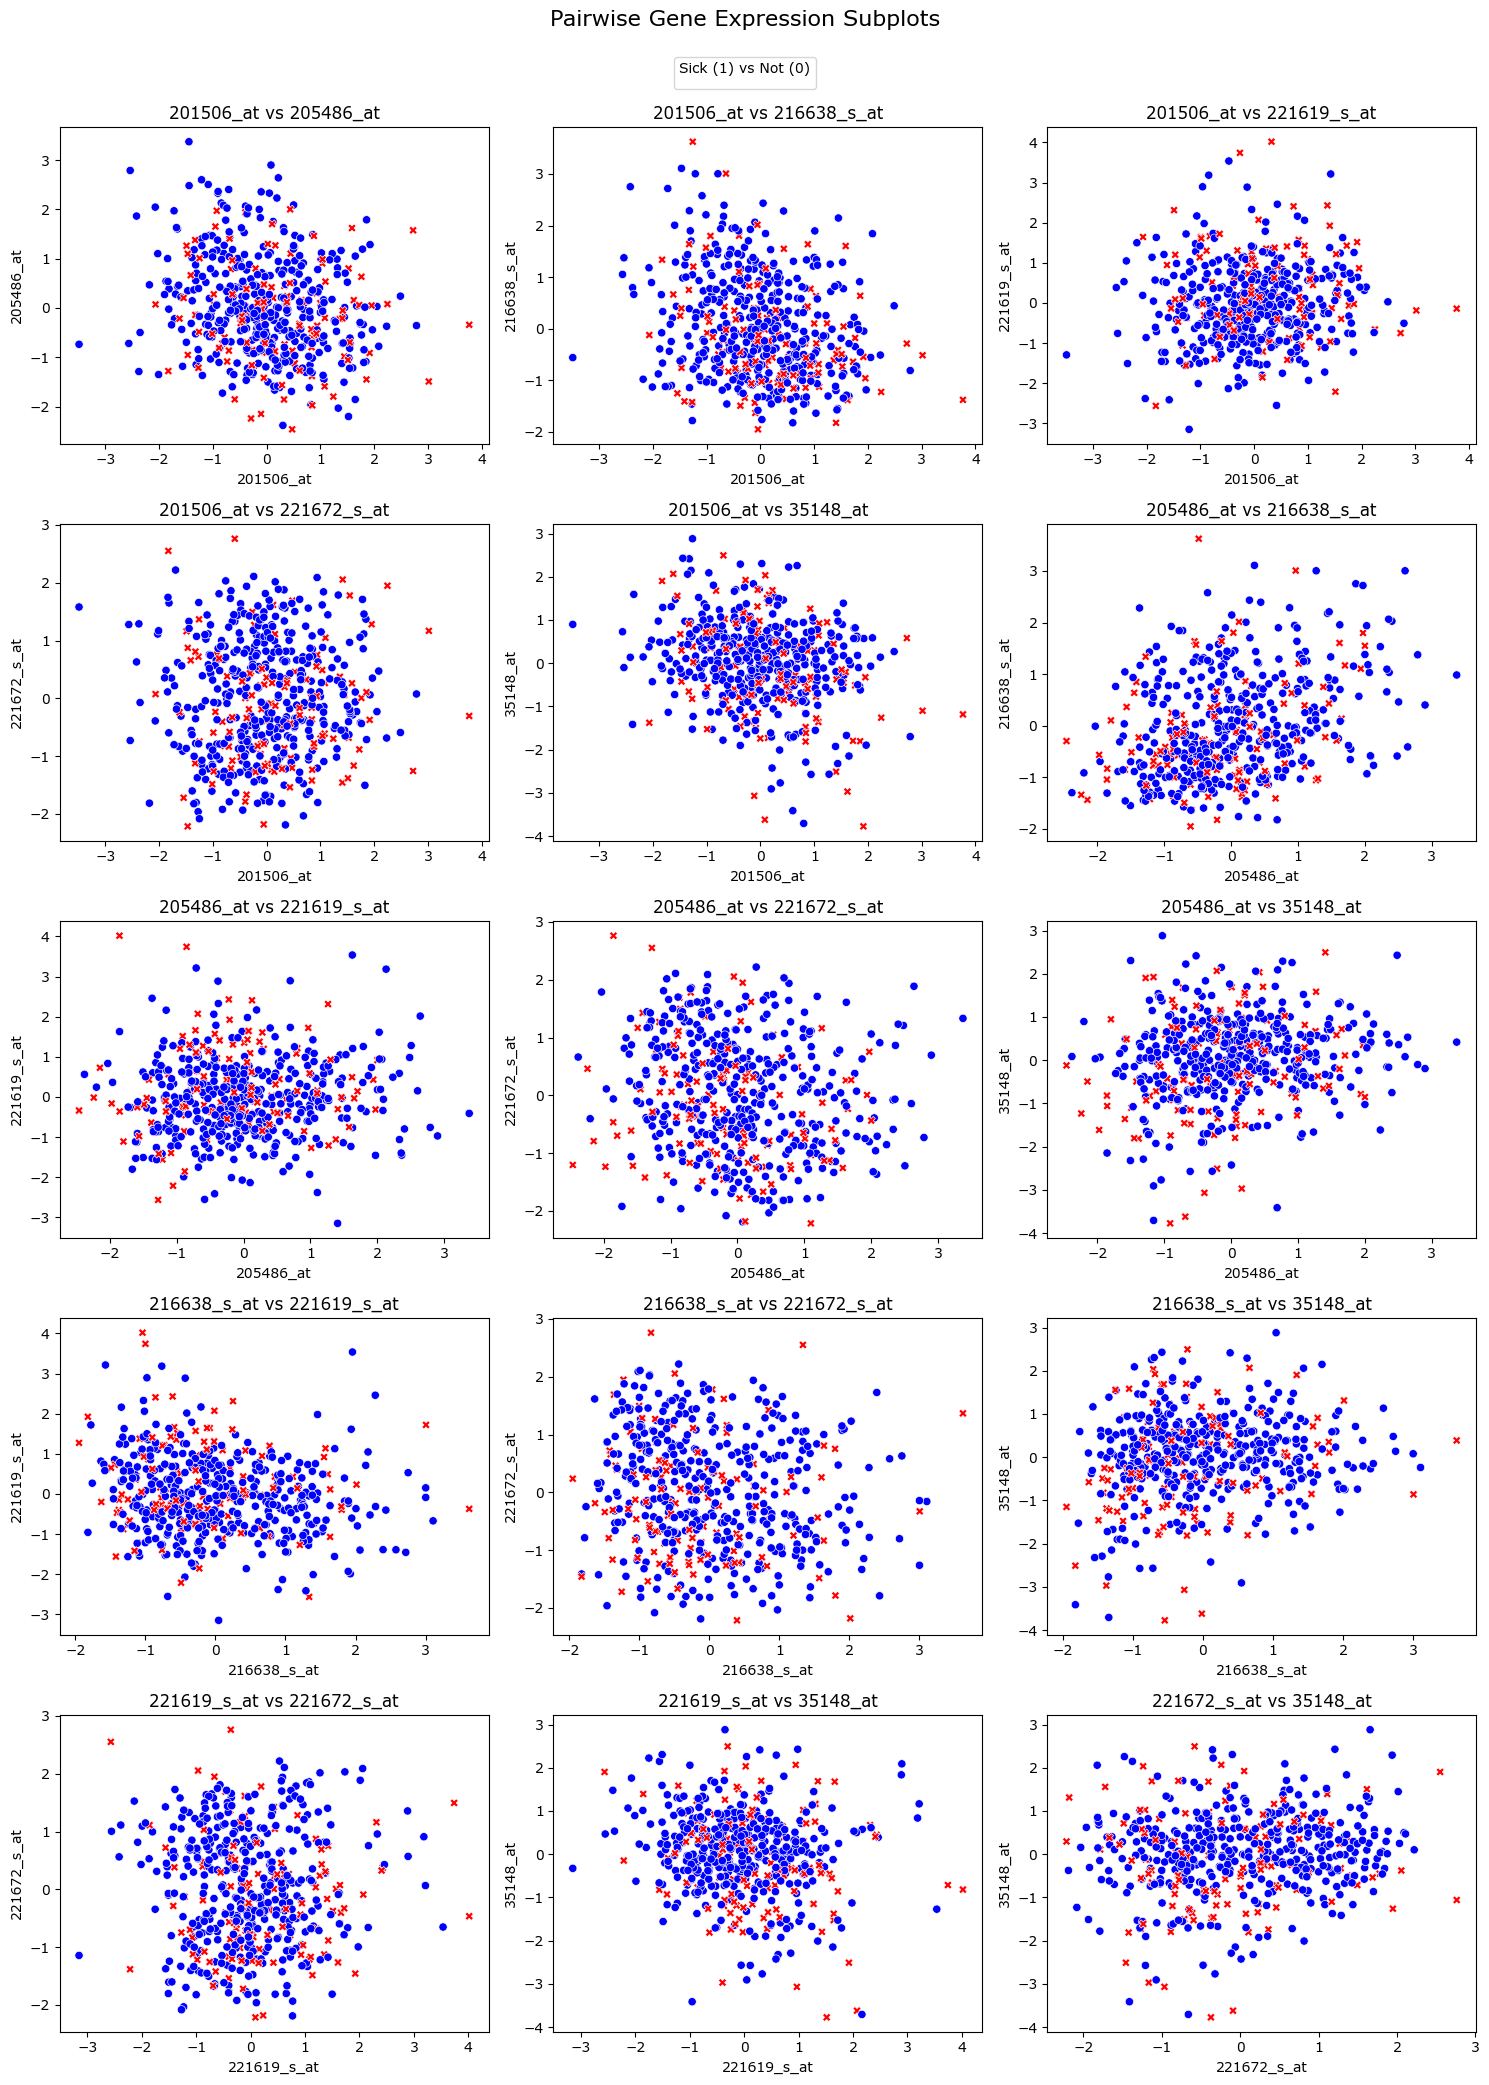

In [3]:
features = data.columns[:-1]  # All gene expression columns
label = data.columns[-1]      # 'relapse..1.True.'

# Generate all unique gene pairs
combs = list(combinations(features, 2))
num_plots = len(combs)

# Determine subplot grid size (e.g., 5 rows × 3 columns for 15 plots)
cols = 3
rows = (num_plots + cols - 1) // cols

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4))
axes = axes.flatten()  # Flatten to 1D for easy indexing

# Plot each gene pair in a  subplot
for i, (x_gene, y_gene) in enumerate(combs):
    ax = axes[i]
    sns.scatterplot(
        data=data,
        x=x_gene,
        y=y_gene,
        hue=label,
        style=label,
        markers={0: 'o', 1: 'X', 2: '>'},
        palette={0: 'blue', 1: 'red', 2: 'orange'},
        ax=ax,
        legend=False  # Disable legend for individual plots
    )
    ax.set_title(f"{x_gene} vs {y_gene}")
    ax.set_xlabel(x_gene)
    ax.set_ylabel(y_gene)

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Add one legend for the whole figure
handles, labels_ = ax.get_legend_handles_labels()
fig.legend(handles, labels_, title='Sick (1) vs Not (0)', loc='upper center', bbox_to_anchor=(0.5, 1.02), ncol=2)

plt.tight_layout()
plt.suptitle("Pairwise Gene Expression Subplots", y=1.04, fontsize=16)
plt.show()


c:\Users\Win\Documents\Github Workspace\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\Win\Documents\Github Workspace\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Win\Documents\Github Workspace\.venv\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
c:\Users\Win\Documents\Github Workspace\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Win\Documents\Github Workspace\.venv\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs

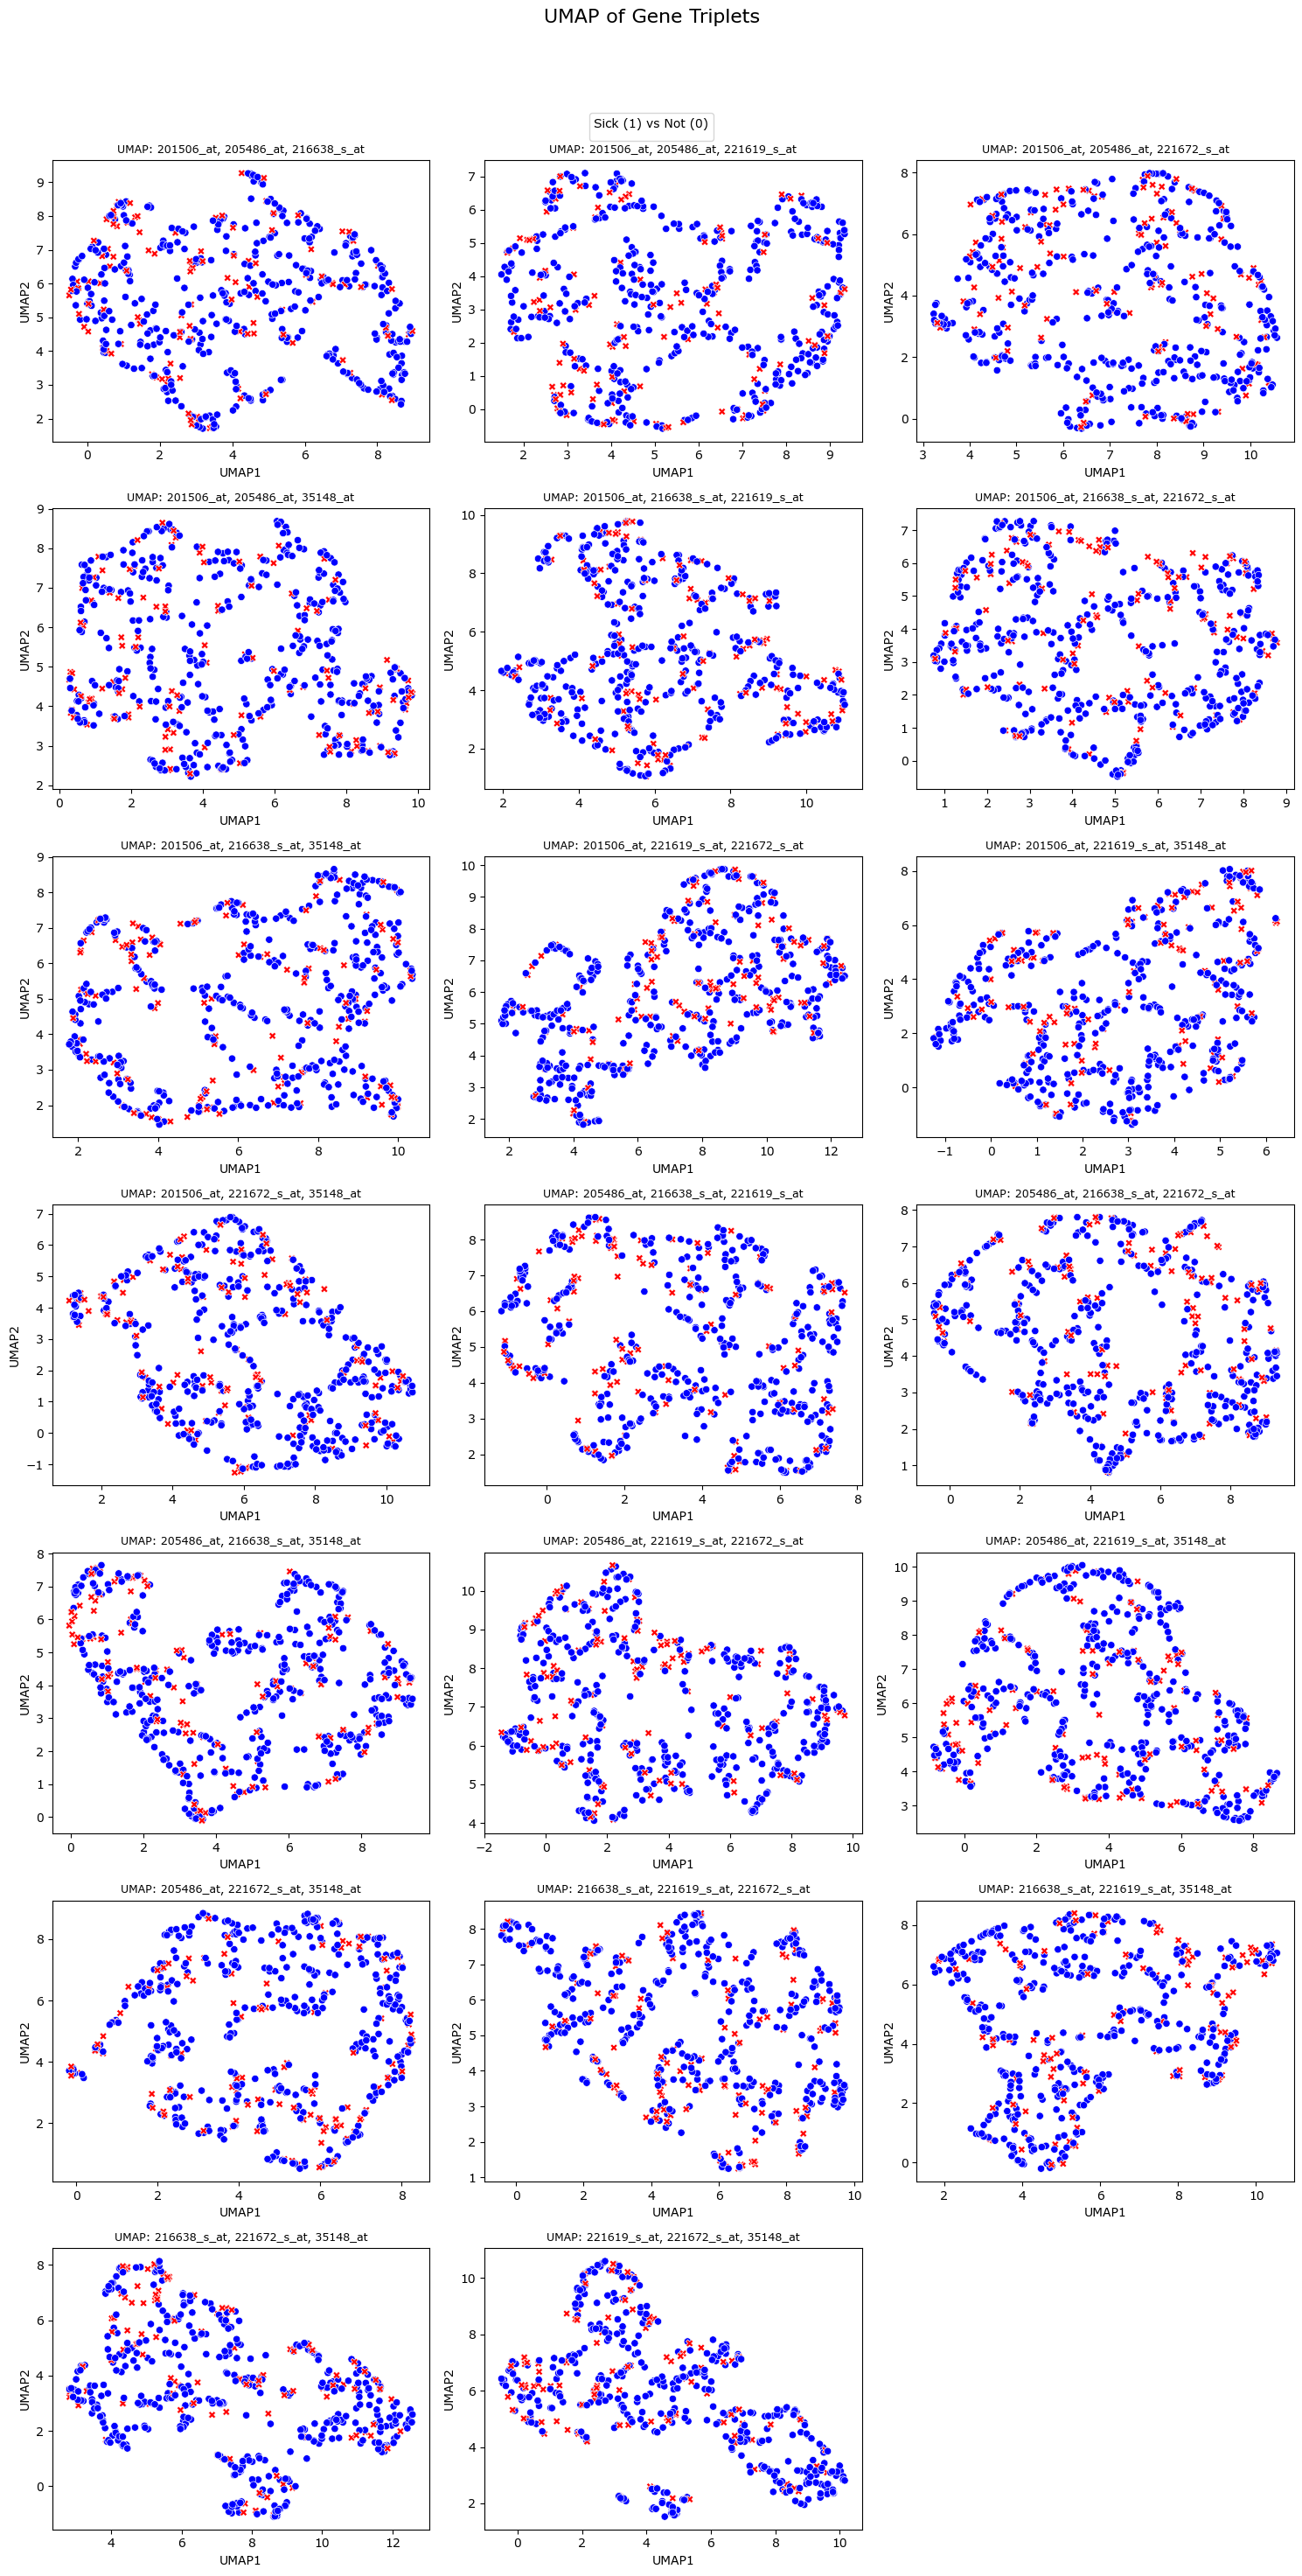

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
import umap
import pandas as pd

# --- Setup ---
features = data.columns[:-1]  # All gene expression columns
label_col = data.columns[-1]  # Target label
combs = list(combinations(features, 3))

# Subplot config
cols = 3
rows = (len(combs) + cols - 1) // cols

# Plot setup
fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4))
axes = axes.flatten()

for i, (gene1, gene2, gene3) in enumerate(combs):
    ax = axes[i]

    # Extract 3 gene features
    X_triplet = data[[gene1, gene2, gene3]]
    y = data[label_col]

    # UMAP: Reduce 3D → 2D
    reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, metric='euclidean', random_state=42)
    X_umap = reducer.fit_transform(X_triplet)

    # Create temp DataFrame
    temp_df = pd.DataFrame(X_umap, columns=['UMAP1', 'UMAP2'])
    temp_df['Label'] = y

    # Plot
    sns.scatterplot(
        data=temp_df,
        x='UMAP1',
        y='UMAP2',
        hue='Label',
        style='Label',
        palette={0: 'blue', 1: 'red', 2: 'orange'},
        markers={0: 'o', 1: 'X', 2: '>'},
        ax=ax,
        legend=False
    )
    ax.set_title(f'UMAP: {gene1}, {gene2}, {gene3}', fontsize=9)

# Remove unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Global legend
handles, labels_ = ax.get_legend_handles_labels()
fig.legend(handles, labels_, title='Sick (1) vs Not (0)', loc='upper center', bbox_to_anchor=(0.5, 1.01), ncol=3)

plt.tight_layout()
plt.suptitle("UMAP of Gene Triplets", y=1.05, fontsize=16)
plt.show()

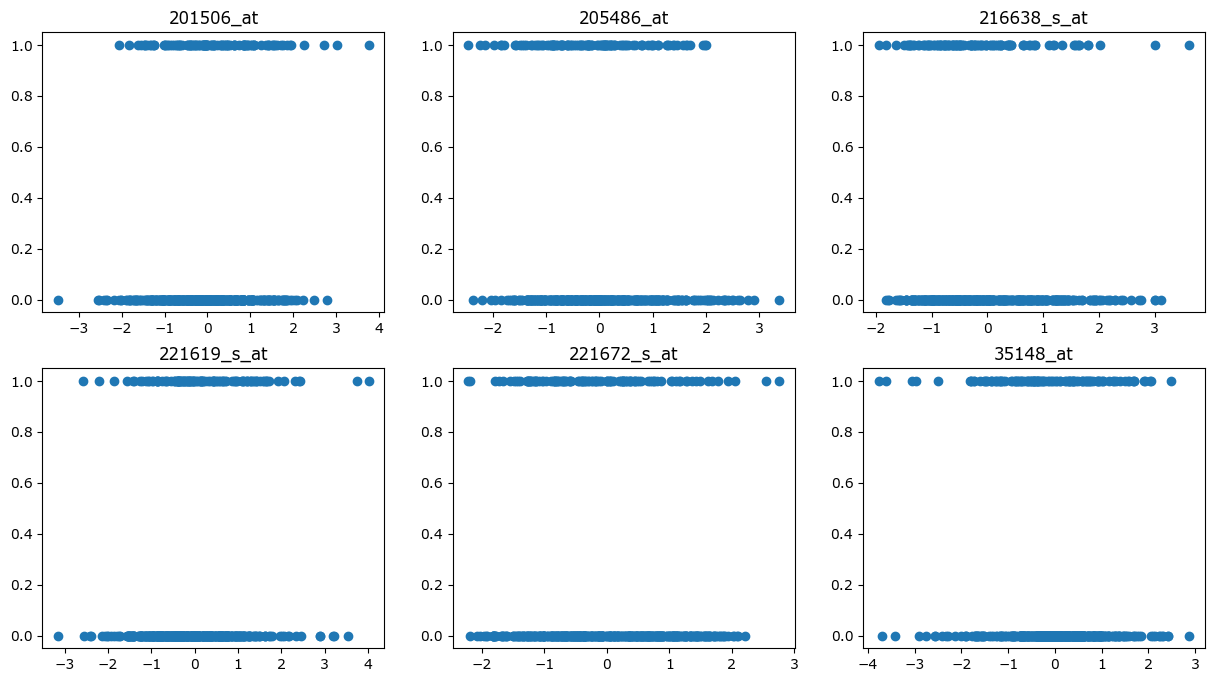

5


In [5]:
fig, ax = plt.subplots(2, 3, figsize=(15, 8))
m = 5

for i, axes in enumerate(ax.flat):
    x = data[data.columns[i]]
    y = data[data.columns[-1]]
    axes.set_title(data.columns[i])
    axes.scatter(x, y)

plt.show()
print(m)